# reference

https://dev.to/azure/opencv-10-lines-to-remove-the-background-in-an-image-3m98

https://stackoverflow.com/questions/29810128/opencv-python-set-background-colour

In [76]:
import cv2
import numpy as np
import imutils
import mediapipe as mp

from matplotlib import pyplot as plt
from cvzone.SelfiSegmentationModule import SelfiSegmentation

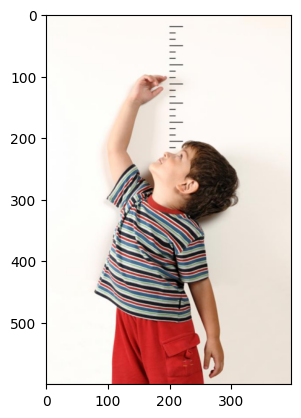

In [77]:
image = cv2.imread('../datasets/object-measure/human1.jpg')
image = imutils.resize(image, height=600)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Try use bitwise operation only

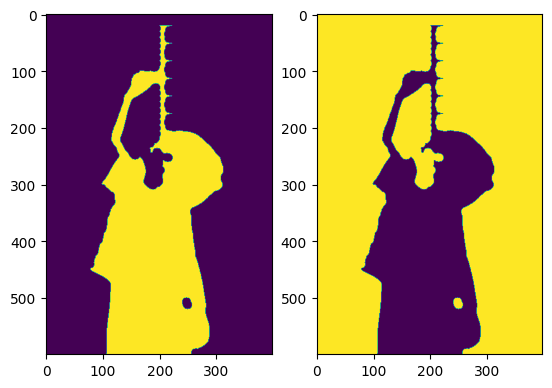

In [79]:
# background color range
lower_white = np.array([150, 150, 150], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(image, lower_white, upper_white)

bg_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_OPEN, (15, 15)))
fg_mask = cv2.bitwise_not(bg_mask) # invert it

fig, axes = plt.subplots(1, 2)
axes[0].imshow(fg_mask)
axes[1].imshow(bg_mask)
plt.show()

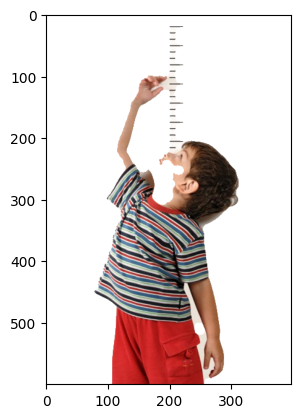

In [80]:
fg_image = cv2.bitwise_and(image, image, mask=fg_mask)
output = fg_image.copy()
output[bg_mask == 255] = 255

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

Using Media Pipe

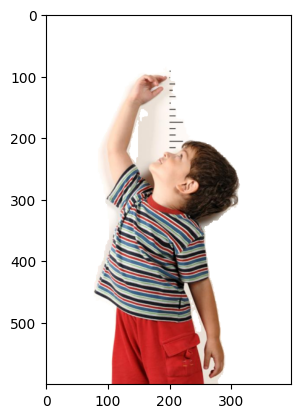

In [82]:

segmentor = SelfiSegmentation()
img = segmentor.removeBG(image, (255, 255, 255))

me = img.copy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [83]:
# cap = cv2.VideoCapture(0)

# segmentor = SelfiSegmentation()

# while True:
#     ret, frame = cap.read()
#     img = segmentor.removeBG(frame, (255, 255, 255), threshold=0.5)
#     cv2.imshow('me', img)
    
#     if cv2.waitKey(1) == ord('q'):
#         break
    
# cap.release()
# cv2.destroyAllWindows()